# Objetivo

Realizar uma varredura dos dados disponíveis e separação dos dados em treino, validação e teste (OOT).

# Pacotes

In [1]:
import os 
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leitura dos dados

In [2]:
base = gzip.open('/home/hugo/Documents/Git_GitHub/Estudo_Cobranca/Dados/base_cobranca.gz', 'rt')
dados = pd.read_csv(base, sep = '\t')
dados.head()

/tmp/ipykernel_19569/3464544722.py:2: DtypeWarning: Columns (12,50) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(base, sep = '\t')


,id,documento,mes_pagamento,dias_atraso,segmento_veiculo,saldo_vencido,pagamento,divida_restante,per_pago,GENERO,...,VAR_306,VAR_307,VAR_308,VAR_309,VAR_310,VAR_311,VAR_312,VAR_313,VAR_314,VAR_315
0,0x117651,0x722945,202301,18,leves,1445.37,0.00,1445.37,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x80136d,0x7fa1e8,202301,28,motos,426.84,426.84,0.00,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x839c27,0x724e31,202301,30,leves,1381.98,1381.98,0.00,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x7675af,0x827ea9,202210,22,leves,1299.22,1299.22,0.00,1.0,M,...,PROXIMO,MUITO LONGE,MUITO LONGE,0.0,1.0,RURAL,CENTRO-OESTE,NaN,D,NaN
4,0x52fa00,0x2772b2,202210,17,motos,493.42,0.00,493.42,0.0,F,...,MEDIO,PROXIMO,PROXIMO,1.0,1.0,URBANO,NORDESTE,0.0,B,1.0


## Análises iniciais

In [4]:
# Avaliação de duplicidade de linhas

dados.duplicated().sum()

np.int64(0)

In [5]:
# Avaliação de informações únicas para id e documento
    # Alguns ids e documentos aparecem mais de uma vez na base
    # Concatenando id e documento, ainda se tem duplicidade

# Por anomes, a quantidade de documentos é única, mas a quantidade de ids não é. Provável que o id (cpf ou cnpj) tenha mais de um veículo/documento (feito no Google Colab)

len(dados['id'].unique()), len(dados['documento'].unique()), len((dados['id']+dados['documento']).unique())

(192156, 194184, 194188)

In [6]:
# Observe nos casos abaixo que: 
    # Para um indivíduo o atraso é curto, mas é pago em sua totalidade
    # Para outro, existe o arrasto da dívida para outros meses e o pagamento se torna parcial

dados[dados['documento'].isin(['0xffff6', '0xfffc', '0x100054', '0x74b012', '0x606c45'])].sort_values(['documento', 'mes_pagamento'])

,id,documento,mes_pagamento,dias_atraso,segmento_veiculo,saldo_vencido,pagamento,divida_restante,per_pago,GENERO,...,VAR_306,VAR_307,VAR_308,VAR_309,VAR_310,VAR_311,VAR_312,VAR_313,VAR_314,VAR_315
70160,0x79e698,0x100054,202203,10,motos,499.02,499.02,0.00,1.000000,F,...,PROXIMO,MUITO LONGE,MEDIO,0.0,1.0,URBANO,CENTRO-OESTE,NaN,F,NaN
353,0x79e698,0x100054,202210,12,motos,499.02,499.02,0.00,1.000000,F,...,PROXIMO,MUITO LONGE,MEDIO,0.0,1.0,URBANO,CENTRO-OESTE,NaN,F,NaN
214171,0x8d0b7e,0x606c45,202203,68,leves,2199.99,802.25,1397.74,0.364661,M,...,PROXIMO,LONGE,PROXIMO,0.0,1.0,URBANO,SUDESTE,NaN,E,NaN
246771,0x8d0b7e,0x606c45,202204,68,leves,2199.99,802.25,1397.74,0.364661,M,...,PROXIMO,LONGE,PROXIMO,0.0,1.0,URBANO,SUDESTE,NaN,E,NaN
209840,0x8d0b7e,0x606c45,202205,67,leves,2199.99,800.11,1399.88,0.363688,M,...,PROXIMO,LONGE,PROXIMO,0.0,1.0,URBANO,SUDESTE,NaN,E,NaN
259554,0x8d0b7e,0x606c45,202206,70,leves,2199.99,2199.99,0.00,1.000000,M,...,PROXIMO,LONGE,PROXIMO,0.0,1.0,URBANO,SUDESTE,NaN,E,NaN
234052,0x8d0b7e,0x606c45,202209,70,leves,2199.99,789.63,1410.36,0.358924,M,...,PROXIMO,LONGE,PROXIMO,0.0,1.0,URBANO,SUDESTE,NaN,E,NaN
273664,0x8d0b7e,0x606c45,202210,70,leves,2199.99,1608.06,591.93,0.730940,M,...,PROXIMO,LONGE,PROXIMO,0.0,1.0,URBANO,SUDESTE,NaN,E,NaN
173882,0x8d0b7e,0x606c45,202211,39,leves,1466.66,0.00,1466.66,0.000000,M,...,PROXIMO,LONGE,PROXIMO,0.0,1.0,URBANO,SUDESTE,NaN,E,NaN
254378,0x8d0b7e,0x606c45,202301,70,leves,2199.99,811.53,1388.46,0.368879,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Avaliação de nulidade das colunas
    # As colunas com pelo menos 60% de nulos serão removidas
    # A nulidade pode ocorrer por falta de dados ou mesmo por alguma etapa de join de bases (as etapas de avaliação de MCAR, MAR e MNAR não foram realizadas)
        # https://ealexbarros.medium.com/principais-tipos-de-dados-faltantes-missing-em-um-dataset-49aa35cf18c8

nulos = pd.DataFrame(dados.isna().sum()).rename(columns = {0: 'nulos'})
nulos.sort_values(by = 'nulos', ascending=False)

perc_nulos = nulos.sort_values(by = 'nulos', ascending=False)/dados.shape[0]
perc_nulos.rename(columns = {'nulos': '%nulos'}, inplace=True)
perc_nulos

,%nulos
VAR_19,1.000000
VAR_255,0.998810
VAR_0,0.998573
VAR_303,0.997277
VAR_39,0.997200
...,...
divida_restante,0.000000
segmento_veiculo,0.000000
documento,0.000000
mes_pagamento,0.000000


In [8]:
# Quantidade de colunas desconsideradas em análises futuras

perc_nulos[perc_nulos['%nulos'] >= 0.6].shape

(73, 1)

In [5]:
# Variáveis a serem removidas

vars_drop = perc_nulos[perc_nulos['%nulos'] >= 0.6].index.tolist()

In [10]:
# Safras existentes na base

np.sort(dados['mes_pagamento'].unique())

array([202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210,
       202211, 202212, 202301])

In [11]:
# Segmentos de veículos

dados['segmento_veiculo'].unique()

array(['leves', 'motos', 'pesados'], dtype=object)

In [12]:
# Volumetria de segmentos de veículos

dados.groupby('segmento_veiculo').count()['id']

segmento_veiculo
leves      213667
motos       86321
pesados        12
Name: id, dtype: int64

<Axes: >

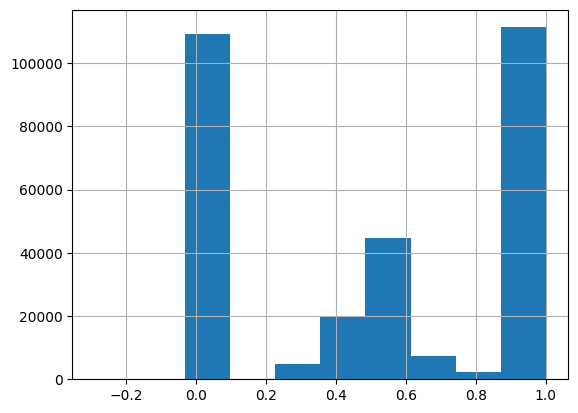

In [13]:
# Distribuição do percentual pago

dados['per_pago'].hist()

<Axes: >

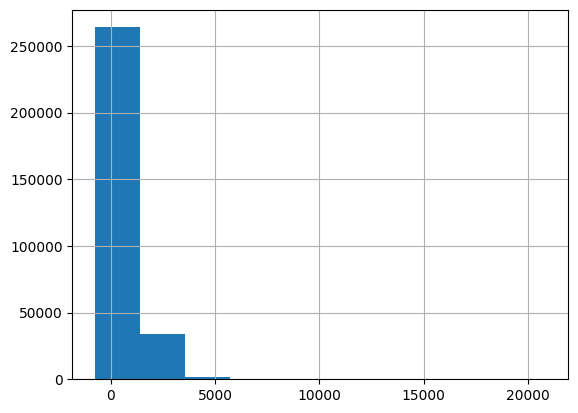

In [15]:
# Distribuição de valores pagos

dados['pagamento'].hist()

In [16]:
dados[dados['pagamento']==0].shape[0]/dados.shape[0]

0.3535566666666667

<Axes: >

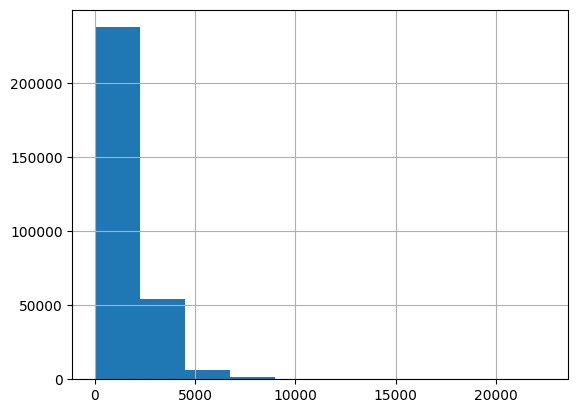

In [17]:
# Distribuição de saldo vencido

dados['saldo_vencido'].hist()

<Axes: >

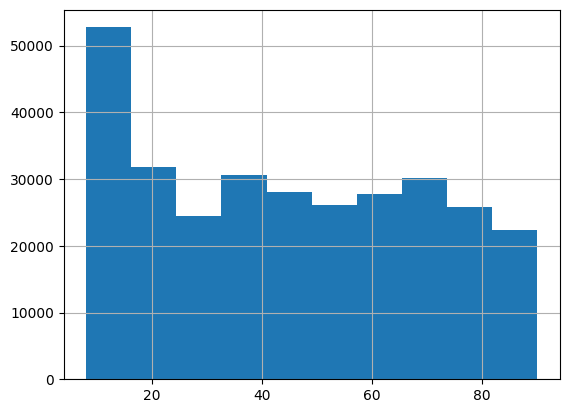

In [18]:
# Distribuição de dias em atraso

dados['dias_atraso'].hist()

In [19]:
# Análise descritiva de dias em atraso
    # O menor atraso foi de 8 dias e o maior foi de 90 dias

dados['dias_atraso'].describe()

count    300000.000000
mean         44.772927
std          24.518707
min           8.000000
25%          22.000000
50%          43.000000
75%          66.000000
max          90.000000
Name: dias_atraso, dtype: float64

<Axes: >

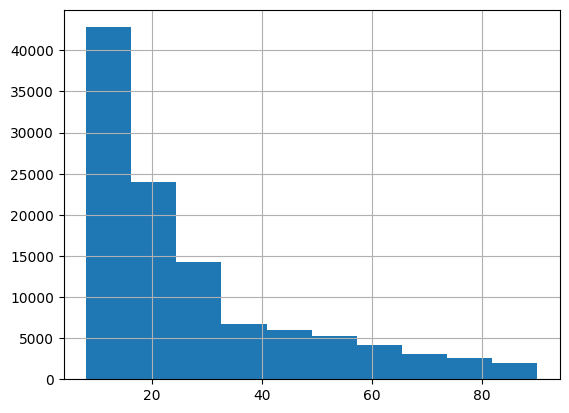

In [20]:
dados[dados['per_pago'] == 1]['dias_atraso'].hist()

<Axes: >

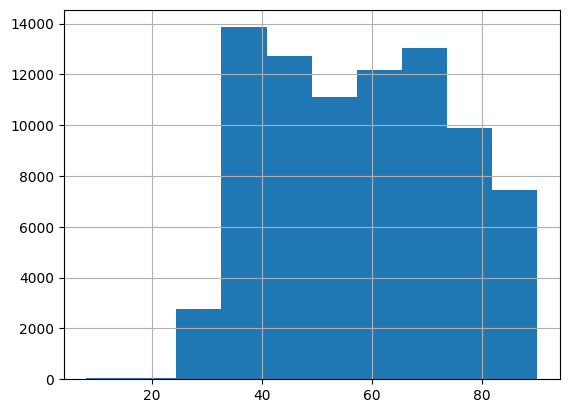

In [21]:
dados[((dados['per_pago'] > 0) & (dados['per_pago'] < 1))]['dias_atraso'].hist()

<Axes: >

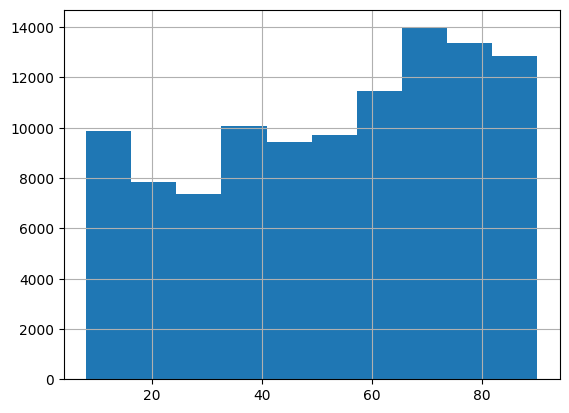

In [22]:
dados[dados['per_pago'] == 0]['dias_atraso'].hist()

<Axes: >

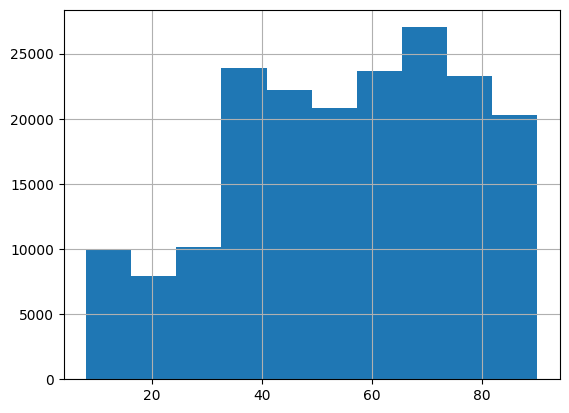

In [23]:
dados[dados['per_pago'] < 1]['dias_atraso'].hist()

In [6]:
# Criação de target para avaliar o pagamento total, parcial ou não pagamento
    # 1 - Pagamento total
    # -1 - Pagamento parcial
    # 0 - Não pagamento

dados['target'] = np.where(dados['per_pago'] == 1, 1, np.where(((dados['per_pago'] > 0) & (dados['per_pago'] < 1)), -1, 0))

In [25]:
dados['target'].value_counts()

target
 1    110872
 0    106057
-1     83071
Name: count, dtype: int64

In [7]:
dados['target'].value_counts(normalize=True)

target
 1    0.369573
 0    0.353523
-1    0.276903
Name: proportion, dtype: float64

In [27]:
# Distribuição dos dias em atraso por pagamentos: total, parcial e não pagamento
    # Note que a distribuição de quem fez o pagamento parcial e não fez o pagamento é semelhante
    # Por simplicidade, pode-se agrupar essas duas classes em uma só: "sem pagamento e pagamento parcial"

# plt.hist(dados[dados['target'] == 0]['dias_atraso'], alpha=0.5, label='Sem pagamento')
# plt.hist(dados[dados['target'] == 1]['dias_atraso'], alpha=0.2, label='Pagamento total')
# plt.hist(dados[dados['target'] == -1]['dias_atraso'], alpha=0.5, label='Pagamento parcial')
# plt.legend(loc='upper right')
# plt.show()

In [ ]:
# Criação de target para avaliar o pagamento total, parcial ou não pagamento
    # 1 - Pagamento total
    # 0 - Não pagamento ou pagamento parcial

# dados['target'] = np.where(dados['per_pago'] == 1, 1, 0)

In [28]:
# plt.hist(dados[dados['target'] == 0]['dias_atraso'], alpha=0.5, label='Não pagamento ou pagamento parcial')
# plt.hist(dados[dados['target'] == 1]['dias_atraso'], alpha=0.2, label='Pagamento total')
# plt.legend(loc='upper right')
# plt.show()

# Particionamento e filtro dos dados faltantes 

In [8]:
# Remove as variáveis com pelo menos 60% de nulos
# Remove as linhas com o segmento de veículo igual a 'pesados'

dados = dados.drop(columns = vars_drop)
dados = dados[dados['segmento_veiculo'] != 'pesados']

In [33]:
treino = dados[dados['mes_pagamento'] < 202210]
oot = dados[dados['mes_pagamento'] >= 202210]

In [10]:
treino.shape

(189362, 256)

In [31]:
# Valida os meses de treino

np.sort(treino['mes_pagamento'].unique())

array([202203, 202204, 202205, 202206, 202207, 202208, 202209])

In [32]:
# Valida os meses da oot

np.sort(oot['mes_pagamento'].unique())

array([202210, 202211, 202212, 202301])

In [35]:
# Considera um id único na base e esse id é o que aparece no último mês de pagamento ou não

treino = treino.sort_values(by='mes_pagamento').drop_duplicates(subset = ['id'], keep='last')

In [36]:
len(treino['id'].unique())

137300

In [37]:
treino.shape

(137300, 256)

In [26]:
# 70% da base de treino será usada para treino e 30% para validação
0.7*137300

96110.0

In [38]:
treino.groupby(['mes_pagamento']).count()['id']

mes_pagamento
202203    14949
202204    15850
202205    18151
202206    18213
202207    20145
202208    23373
202209    26619
Name: id, dtype: int64

In [39]:
validacao = treino.groupby(['mes_pagamento']).sample(frac=.3, random_state=123)

In [40]:
validacao.shape

(41191, 256)

In [41]:
validacao.groupby(['mes_pagamento']).count()['id']

mes_pagamento
202203    4485
202204    4755
202205    5445
202206    5464
202207    6044
202208    7012
202209    7986
Name: id, dtype: int64

In [42]:
treino = treino.drop(index=validacao.index)

In [43]:
treino.shape

(96109, 256)

In [44]:
treino.groupby(['mes_pagamento']).count()['id']

mes_pagamento
202203    10464
202204    11095
202205    12706
202206    12749
202207    14101
202208    16361
202209    18633
Name: id, dtype: int64

In [45]:
treino.shape[0]+validacao.shape[0] 

137300

## Salva bases

# Conclusões

- Desconsidera/remove variáveis com pelo menos 60% de dados faltantes;

- Desconsidera/remove linhas do segmento de veículos pesados;

- Criação da variável target: 1 - se o indivíduo pagou totalmente o atraso; 0 - caso o indivíduo não pagou nada e -1 - caso o indivíduo pagou parcialmente;

- Separação das bases em treino, validação e teste (OOT). A base de validação foi construída considerando fatias dos meses de pagamentos.